In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sb

In [2]:
basepath = "C:/Users/JECH_19/Documents/ciencia datos python"

In [3]:
archivo1= basepath + "/prueba.xlsx"

In [4]:
dfind = pd.read_excel(archivo1)


In [5]:
dfind

,Año,Mes,Consumo en Kpc,Producción Ton.
0,1998,Enero,134880,2385730
1,1998,Febrero,138240,2040070
2,1998,Marzo,138480,2161680
3,1998,Abril,122880,2103370
4,1998,Mayo,155280,2401320
5,1998,Junio,157920,2537565
6,1998,Julio,159600,2303359
7,1998,Agosto,177600,2811775
8,1998,Septiembre,158880,2337090
9,1998,Octubre,131040,2157733


<AxesSubplot:xlabel='Producción Ton.', ylabel='Consumo en Kpc'>

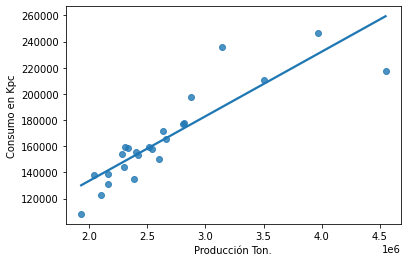

In [6]:
sb.regplot(x='Producción Ton.', y='Consumo en Kpc', ci=None, data=dfind)

In [7]:
x = dfind['Producción Ton.']
y = dfind['Consumo en Kpc']
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x, y)
r2 = r_value1**2
slope1=round(slope1, 4)
intercept1=round(intercept1)
print("pendiente:",slope1) 
print("interseccion eje:", intercept1)
print("R2:", r2)


pendiente: 0.0493
interseccion eje: 34995
R2: 0.7753139270861864


In [36]:
dfind['Ecalculado']=((dfind['Producción Ton.']*slope1)+intercept1)

dfind['E^2']=dfind['Consumo en Kpc']**2


dfind['Ei*Pi']=dfind['Consumo en Kpc']*dfind['Producción Ton.']


suma_Ei= dfind['Consumo en Kpc'].sum()
suma_E2=dfind['E^2'].sum()
suma_EixPi=dfind['Ei*Pi'].sum()
print('sumatoria Ei=', suma_Ei)
print('sumatoria E^2=', suma_E2)
print('sumatoria Ei*Pi=', suma_EixPi)

des_Est=((suma_E2-(intercept1*suma_Ei)-(slope1*suma_EixPi))/(dfind.shape[0]-2))**0.5
des_Est=round(des_Est, 5)
print('Des. estan',des_Est)


sumatoria Ei= 3966621
sumatoria E^2= 683143852105
sumatoria Ei*Pi= 10914732989285
Des. estan 16835.58709


In [37]:
por_dt_eliminar = 40
x=4
while (por_dt_eliminar < 15 or por_dt_eliminar > 30):
    
   dfind['E+(x*Sy,x)']=dfind['Ecalculado']+(des_Est*x)
   dfind['E-(x*Sy,x)']=dfind['Ecalculado']-(des_Est*x)

   dfind['(E+Sy,x)-Ei']=dfind['E+(x*Sy,x)']-dfind['Consumo en Kpc']
   dfind['Ei-(E-Sy,x)']=dfind['Consumo en Kpc']-dfind['E-(x*Sy,x)']

   dffiltro = dfind.drop(dfind[dfind['(E+Sy,x)-Ei']<0].index)
   dffiltro = dffiltro.drop(dffiltro[dffiltro['Ei-(E-Sy,x)']<0].index)
   dffiltro.reset_index(drop=True, inplace=True)

   dt_eliminar = dfind.shape[0]-dffiltro.shape[0]
   por_dt_eliminar=(dt_eliminar/dfind.shape[0])*100
   print(por_dt_eliminar,'%')
   print(dt_eliminar)
   print('x',x)
   x = x-0.2
   


0.0 %
0
x 4
0.0 %
0
x 3.8
0.0 %
0
x 3.5999999999999996
0.0 %
0
x 3.3999999999999995
0.0 %
0
x 3.1999999999999993
0.0 %
0
x 2.999999999999999
0.0 %
0
x 2.799999999999999
4.166666666666666 %
1
x 2.5999999999999988
8.333333333333332 %
2
x 2.3999999999999986
8.333333333333332 %
2
x 2.1999999999999984
8.333333333333332 %
2
x 1.9999999999999984
8.333333333333332 %
2
x 1.7999999999999985
8.333333333333332 %
2
x 1.5999999999999985
8.333333333333332 %
2
x 1.3999999999999986
16.666666666666664 %
4
x 1.1999999999999986


In [10]:
dfind

,Año,Mes,Consumo en Kpc,Producción Ton.,Ecalculado,E^2,Ei*Pi,"E+(x*Sy,x)","E-(x*Sy,x)","(E+Sy,x)-Ei","Ei-(E-Sy,x)"
0,1998,Enero,134880,2385730,152611.4890,18192614400,321787262400,172814.193508,132408.784492,37934.193508,2471.215508
1,1998,Febrero,138240,2040070,135570.4510,19110297600,282019276800,155773.155508,115367.746492,17533.155508,22872.253508
2,1998,Marzo,138480,2161680,141565.8240,19176710400,299349446400,161768.528508,121363.119492,23288.528508,17116.880508
3,1998,Abril,122880,2103370,138691.1410,15099494400,258462105600,158893.845508,118488.436492,36013.845508,4391.563508
4,1998,Mayo,155280,2401320,153380.0760,24111878400,372876969600,173582.780508,133177.371492,18302.780508,22102.628508
5,1998,Junio,157920,2537565,160096.9545,24938726400,400732264800,180299.659008,139894.249992,22379.659008,18025.750008
6,1998,Julio,159600,2303359,148550.5987,25472160000,367616096400,168753.303208,128347.894192,9153.303208,31252.105808
7,1998,Agosto,177600,2811775,173615.5075,31541760000,499371240000,193818.212008,153412.802992,16218.212008,24187.197008
8,1998,Septiembre,158880,2337090,150213.5370,25242854400,371316859200,170416.241508,130010.832492,11536.241508,28869.167508
9,1998,Octubre,131040,2157733,141371.2369,17171481600,282749332320,161573.941408,121168.532392,30533.941408,9871.467608


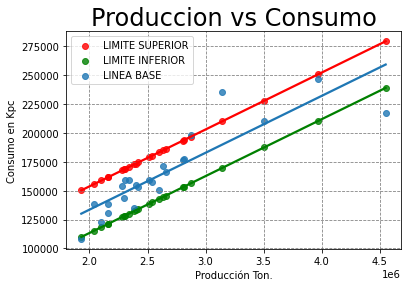

In [11]:
fig, ax = plt.subplots()
sb.regplot(x='Producción Ton.', y='E+(x*Sy,x)', data=dfind, ax=ax, color='r',label = "LIMITE SUPERIOR")
sb.regplot(x='Producción Ton.', y='E-(x*Sy,x)', data=dfind, ax=ax, color='g',label = "LIMITE INFERIOR")
sb.regplot(x='Producción Ton.', y='Consumo en Kpc',ci=None, data=dfind, ax=ax,label = "LINEA BASE")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Consumo" , size = 24 )
plt.legend()
plt.show()

In [12]:
df_lin_met= dffiltro.drop(['Ecalculado', 'E^2', 'Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'], axis=1)
df_lin_met

,Año,Mes,Consumo en Kpc,Producción Ton.
0,1998,Enero,134880,2385730
1,1998,Febrero,138240,2040070
2,1998,Marzo,138480,2161680
3,1998,Abril,122880,2103370
4,1998,Mayo,155280,2401320
5,1998,Junio,157920,2537565
6,1998,Julio,159600,2303359
7,1998,Agosto,177600,2811775
8,1998,Septiembre,158880,2337090
9,1998,Octubre,131040,2157733


In [13]:
x = df_lin_met['Producción Ton.']
y = df_lin_met['Consumo en Kpc']
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x, y)
r22 = r_value2**2
print("pendiente:",slope2) 
print("interseccion eje:", intercept2)
print("R2:", r22)

pendiente: 0.0579470939089483
interseccion eje: 12832.462825853232
R2: 0.9243316228473009


In [14]:
df_lin_met['Consumo teorico']=(slope2*df_lin_met['Producción Ton.']+intercept2)


In [15]:
df_lin_met['Real-Teorico']=df_lin_met['Consumo en Kpc']-df_lin_met['Consumo teorico']

In [16]:
df_lin_met['Diferencia al cuadrado']=df_lin_met['Real-Teorico'].clip(upper=0)


In [17]:
dfaux=df_lin_met['Diferencia al cuadrado']**2


In [18]:
dfaux = dfaux.drop(dfaux[dfaux==0].index)
dfaux.reset_index(drop=True, inplace=True)
val_neg=dfaux.shape[0]


In [19]:
varianza=(dfaux.sum())/val_neg

In [20]:
D_estandar=varianza**0.5
print("varianza= ",varianza)
print("Des. Estandar= ",D_estandar)

varianza=  81427386.48336557
Des. Estandar=  9023.71245571165


In [21]:
df_lin_met['Linea meta'] = ((slope2*df_lin_met['Producción Ton.'])+D_estandar) 


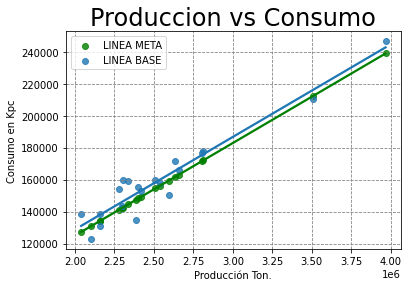

In [22]:
fig, ax = plt.subplots()
sb.regplot(x='Producción Ton.', y='Linea meta', data=df_lin_met, ax=ax, color='g',label = "LINEA META")
sb.regplot(x='Producción Ton.', y='Consumo en Kpc',ci=None, data=df_lin_met, ax=ax,label = "LINEA BASE")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Consumo" , size = 24 )
plt.legend()
plt.show()

In [23]:
dlt_E0=intercept2-D_estandar
prc_enrg=1000
Ahrr_mes=dlt_E0*prc_enrg
Ahrr_año=Ahrr_mes*12


In [24]:
df_IC= dffiltro.drop(['Ecalculado', 'E^2', 'Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'], axis=1)

In [25]:
df_IC['IC Real']=df_IC['Consumo en Kpc']/df_IC['Producción Ton.']


In [26]:
df_IC['IC Teorico']=slope2+(intercept2/df_IC['Producción Ton.'])


In [27]:
df_IC['2*E0/P^3']= (2*intercept2)/(df_IC['Producción Ton.'])**3


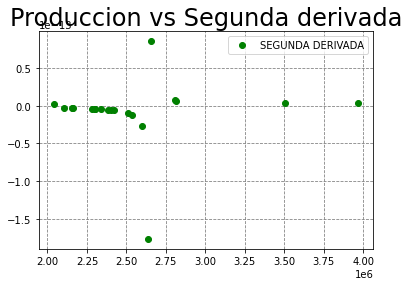

In [28]:
fig, ax = plt.subplots()
x=df_IC['Producción Ton.']
y=df_IC['2*E0/P^3']
plt.plot(x, y,'o' ,color='g',label = "SEGUNDA DERIVADA")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Segunda derivada" , size = 24 )
plt.legend()
plt.show()

In [29]:
maxx=round(df_IC['Producción Ton.'].max())
minx=round(df_IC['Producción Ton.'].min())
maxy=round(df_IC['IC Real'].max())
maxx
minx
maxy

0

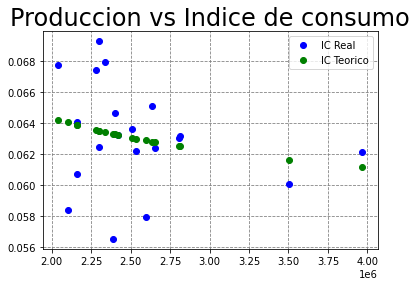

In [30]:
fig, ax = plt.subplots()
x=df_IC['Producción Ton.']
y=df_IC['IC Real']
y1=df_IC['IC Teorico']
modelo = np.poly1d (np.polyfit (x, y, 2))
plt.plot(x, y,'o' ,color='b',label = "IC Real")
plt.plot(x, y1,'o' ,color='g',label = "IC Teorico")
polilinea=np.linspace(minx,maxx,maxy)
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Indice de consumo" , size = 24 )
plt.plot(polilinea,modelo(polilinea))
plt.legend()
plt.show()

In [31]:
mean_consumo= df_IC['Consumo en Kpc'].mean()
mean_produccion=df_IC['Producción Ton.'].mean()

min_IC_Teorico=df_IC['IC Teorico'].min()
df_val_min=df_IC[df_IC['IC Teorico']==min_IC_Teorico]

min_IC_Real=df_val_min['IC Real'].values[0]
val_prod_segun_IC_min=df_val_min['Producción Ton.'].values[0]
pot_ahorro=abs(mean_produccion*(min_IC_Real-min_IC_Teorico))
porcen_ahorr=(pot_ahorro/mean_consumo)*100
Ah_econo=pot_ahorro*1000
TPH=30*24


rata_critica=val_prod_segun_IC_min/TPH
rata_produccion=mean_produccion/TPH
print('promedio de consumo:',mean_consumo)
print('promedio de produccion:',mean_produccion)
print('valor minimo de IC Real:',min_IC_Real)
print('valor minimo de IC Teorico:',min_IC_Teorico)
print('potencial de ahorro:',pot_ahorro)
print('porcentaje de ahorro:',porcen_ahorr)
print('ahorro economico:',Ah_econo)
print('TPH:',TPH)
print ('valor de produccion segun IC minimo:',val_prod_segun_IC_min)
print('rata critica:',rata_critica)
print('rata de produccion:',rata_produccion)

promedio de consumo: 160357.35
promedio de produccion: 2545854.8
valor minimo de IC Real: 0.062150831652082385
valor minimo de IC Teorico: 0.06118166517378672
potencial de ahorro: 2467.3571307681204
porcentaje de ahorro: 1.5386617019850481
ahorro economico: 2467357.1307681203
TPH: 720
valor de produccion segun IC minimo: 3967284
rata critica: 5510.116666666667
rata de produccion: 3535.909444444444


In [32]:
dforg= dfind.drop(['Ecalculado', 'E^2', 'Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'], axis=1)
dfpresupuesto=dforg
n=len(dfpresupuesto['Producción Ton.'])
a = 0
b = 1


In [33]:
x3 = dforg['Producción Ton.']
y3= dforg['Consumo en Kpc']
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(x3, y3)
r23 = r_value3**2
print("pendiente:",slope3) 
print("interseccion eje:", intercept3)
print("R2:", r23)

pendiente: 0.049304017512758605
interseccion eje: 34995.01718898106
R2: 0.7753139270861864


In [34]:

while a == 0:
    print('Introduzca la poduccion del siguiente mes ', end='')
    p=input()
    p=int(p)
    dfpresupuesto.at[n,'produccion planeada']=p
    print('presione 0 para agregar otro mes y 1 para finalizar', end='')
    a = input() 
    a = int (a)
    n = n+1
    b = b+1
print ('xxx')

Introduzca la poduccion del siguiente mes 

ValueError: invalid literal for int() with base 10: ''

In [ ]:
n1 = (n-b) + 1
while n1 != n:
    dfpresupuesto.at[n1,'consumo teorico']=(slope3*dfpresupuesto.at[n1,'produccion planeada'])+intercept3
    n1 = n1+1
    n1 = int(n1)
print ('xxx')

In [ ]:
n1 = (n-b) + 1

while n1 != n:
    print('Introduzca consumo del mes ', end='')
    c=input()
    c=int(c)
    dfpresupuesto.at[n1,'consumo real']=c
    n1 = n1+1
    n1 = int(n1)
print ('xxx')

In [ ]:
n1 = (n-b) + 1
while n1 != n:
    print('Introduzca produccion del mes ', end='')
    p=input()
    p = int(p)
    dfpresupuesto.at[n1,'produccion real']=p
    n1 = n1+1
    n1 = int(n1)
print ('xxx')

In [ ]:
dfpresupuesto['Var_pres_pro']=slope3*(dfpresupuesto['produccion real']-dfpresupuesto['produccion planeada'])

In [ ]:
dfpresupuesto['E linea base']=(slope3*dfpresupuesto['produccion real'])+intercept3

In [ ]:
dfpresupuesto['Var_pres_efi']=dfpresupuesto['consumo real']-dfpresupuesto['E linea base']

In [ ]:
dfpresupuesto['Var_total']=dfpresupuesto['Var_pres_efi']+dfpresupuesto['Var_pres_pro']

In [ ]:
dfpresupuesto

In [ ]:
n1 = (n-b) + 1

while n1 != n:
    if dfpresupuesto.at[n1,'Var_pres_pro']>0 and dfpresupuesto.at[n1,'Var_pres_efi']<0:
        dfpresupuesto.at[n1,'Observacion']='Fui eficiente en produccion y eficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']<0 and dfpresupuesto.at[n1,'Var_pres_efi']<0:   
        dfpresupuesto.at[n1,'Observacion']='Fui ineficiente en produccion y eficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']>0 and dfpresupuesto.at[n1,'Var_pres_efi']>0:   
        dfpresupuesto.at[n1,'Observacion']='Fui eficiente en produccion e ineficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']<0 and dfpresupuesto.at[n1,'Var_pres_efi']>0:   
        dfpresupuesto.at[n1,'Observacion']='Fui ineficiente en produccion e ineficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']==0 and dfpresupuesto.at[n1,'Var_pres_efi']>0:   
        dfpresupuesto.at[n1,'Observacion']='produccion solicitada e ineficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']==0 and dfpresupuesto.at[n1,'Var_pres_efi']<0:   
        dfpresupuesto.at[n1,'Observacion']='produccion solicitada y eficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']>0 and dfpresupuesto.at[n1,'Var_pres_efi']==0:   
        dfpresupuesto.at[n1,'Observacion']='eficiente en produccion y eficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']<0 and dfpresupuesto.at[n1,'Var_pres_efi']==0:   
        dfpresupuesto.at[n1,'Observacion']='ineficiente en produccion y eficiente en consumo'
    if dfpresupuesto.at[n1,'Var_pres_pro']>0 and dfpresupuesto.at[n1,'Var_pres_efi']==0:   
        dfpresupuesto.at[n1,'Observacion']='produccion solicitada y eficiente en consumo'
    n1 = n1+1
print ('xxx')

In [ ]:
dfpresupuesto

In [ ]:
dforg= dfind.drop(['Ecalculado', 'E^2', 'Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'], axis=1)

In [ ]:
df_indefic_año2=dforg


In [ ]:
indexNames=df_indefic_año2[df_indefic_año2['Año']==2004].index

In [ ]:
df_indefic_año2.drop(indexNames, inplace=True)

In [ ]:
df_indefic_año2.reset_index(drop=True, inplace=True)

In [ ]:
df_indefic_año2

In [ ]:
dforg= dfind.drop(['Ecalculado', 'E^2', 'Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'], axis=1)

In [ ]:
df_indefic_año1=dforg

In [ ]:

indexNames=df_indefic_año1[df_indefic_año1['Año']==2005].index

In [ ]:
df_indefic_año1.drop(indexNames, inplace=True)


In [ ]:
df_indefic_año1

In [ ]:
x4 = df_indefic_año1['Producción Ton.']
y4= df_indefic_año1['Consumo en Kpc']
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(x4, y4)
r24 = r_value4**2
print("pendiente:",slope4) 
print("interseccion eje:", intercept4)
print("R2:", r24)

In [ ]:
df_indefic_año1

In [ ]:

df_indefic_año1['Ecalculado']=((df_indefic_año1['Producción Ton.']*slope4)+intercept4)

df_indefic_año1['E^2']=df_indefic_año1['Consumo en Kpc']**2

df_indefic_año1['Ei*Pi']=df_indefic_año1['Consumo en Kpc']*df_indefic_año1['Producción Ton.']


suma_Ei= df_indefic_año1['Consumo en Kpc'].sum()
suma_E2=df_indefic_año1['E^2'].sum()
suma_EixPi=df_indefic_año1['Ei*Pi'].sum()
print('sumatoria Ei=', suma_Ei)
print('sumatoria E^2=', suma_E2)
print('sumatoria Ei*Pi=', suma_EixPi)

des_Est=((suma_E2-(intercept4*suma_Ei)-(slope4*suma_EixPi))/(df_indefic_año1.shape[0]-2))**0.5
print(des_Est)

In [ ]:
dfaux1=df_indefic_año1.drop(['Ecalculado', 'E^2', 'Ei*Pi'], axis=1)

In [ ]:
df_indefic_año1

In [ ]:
por_dt_eliminar1 = 40
x=4
while (por_dt_eliminar1 < 1 or por_dt_eliminar1 > 30):
    
   df_indefic_año1['E+(x*Sy,x)']=df_indefic_año1['Ecalculado']+(des_Est*x)
   df_indefic_año1['E-(x*Sy,x)']=df_indefic_año1['Ecalculado']-(des_Est*x)

   df_indefic_año1['(E+Sy,x)-Ei']=df_indefic_año1['E+(x*Sy,x)']-df_indefic_año1['Consumo en Kpc']
   df_indefic_año1['Ei-(E-Sy,x)']=df_indefic_año1['Consumo en Kpc']-df_indefic_año1['E-(x*Sy,x)']

   dffiltro1 = df_indefic_año1.drop(df_indefic_año1[df_indefic_año1['(E+Sy,x)-Ei']<0].index)
   dffiltro1 = dffiltro1.drop(dffiltro1[dffiltro1['Ei-(E-Sy,x)']<0].index)
   dffiltro1.reset_index(drop=True, inplace=True)

   dt_eliminar1 = df_indefic_año1.shape[0]-dffiltro1.shape[0]
   por_dt_eliminar1=(dt_eliminar1/df_indefic_año1.shape[0])*100
   print(por_dt_eliminar1,'%')
   print(dt_eliminar1)
   print(x)
   x = x-0.2
   


In [ ]:
df_indefic_año1

In [ ]:
fig, ax = plt.subplots()
sb.regplot(x='Producción Ton.', y='E+(x*Sy,x)', data=df_indefic_año1, ax=ax, color='r',label = "LIMITE SUPERIOR")
sb.regplot(x='Producción Ton.', y='E-(x*Sy,x)', data=df_indefic_año1, ax=ax, color='g',label = "LIMITE INFERIOR")
sb.regplot(x='Producción Ton.', y='Consumo en Kpc',ci=None, data=df_indefic_año1, ax=ax,label = "LINEA BASE")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Consumo" , size = 24 )
plt.legend()
plt.show()

In [ ]:
dffiltro1=dffiltro1.drop(['Ecalculado','E^2','Ei*Pi','E+(x*Sy,x)','E-(x*Sy,x)','(E+Sy,x)-Ei','Ei-(E-Sy,x)'],axis=1)

In [ ]:
x = dffiltro1['Producción Ton.']
y = dffiltro1['Consumo en Kpc']
slope5, intercept5, r_value5, p_value5, std_err5 = linregress(x, y)
r25 = r_value5**2
print("pendiente:",slope5) 
print("interseccion eje:", intercept5)
print("R2:", r25)

In [ ]:
dffiltro1['Consumo teorico']=(slope5*dffiltro1['Producción Ton.']+intercept5)


In [ ]:
dffiltro1['Real-Teorico']=dffiltro1['Consumo en Kpc']-dffiltro1['Consumo teorico']

In [ ]:
dffiltro1['Diferencia al cuadrado']=(dffiltro1['Real-Teorico'].clip(upper=0))**2


In [ ]:
dffiltro1

In [ ]:
dfaux1=dffiltro1['Diferencia al cuadrado']
dfaux1

In [ ]:
dfaux1 = dfaux1.drop(dfaux1[dfaux1==0].index)
dfaux1.reset_index(drop=True, inplace=True)
val_neg1=dfaux1.shape[0]
val_neg1

In [ ]:
varianza1=(dfaux1.sum()/val_neg1)

In [ ]:
D_estandar1=varianza1**0.5
print("varianza= ",varianza1)
print("Des. Estandar= ",D_estandar1)


In [ ]:
dffiltro1

In [ ]:
dffiltro1['Linea meta'] = ((slope5*dffiltro1['Producción Ton.'])+D_estandar1) 
dffiltro1

In [ ]:
fig, ax = plt.subplots()
sb.regplot(x='Producción Ton.', y='Linea meta', data=dffiltro1, ax=ax, color='g',label = "LINEA META")
sb.regplot(x='Producción Ton.', y='Consumo en Kpc',ci=None, data=dffiltro1, ax=ax,label = "LINEA BASE")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Consumo" , size = 24 )
plt.legend()
plt.show()

In [ ]:
df_indefic_año2['EL=mlb*Preal+E0LB']=(slope5*df_indefic_año2['Producción Ton.'])+intercept5

In [ ]:
df_indefic_año2['Em=mlm*Preal+E0Lm']=(slope5*df_indefic_año2['Producción Ton.'])+D_estandar1

In [ ]:
df_indefic_año2['lb100=(Elb/Ereal)*100']=(df_indefic_año2['EL=mlb*Preal+E0LB']/df_indefic_año2['Consumo en Kpc'])*100

In [ ]:
df_indefic_año2['lb100=(Elm/Ereal)*100']=(df_indefic_año2['Em=mlm*Preal+E0Lm']/df_indefic_año2['Consumo en Kpc'])*100

In [ ]:
df_indefic_año2.reset_index(drop=True, inplace=True)
tam=(df_indefic_año2.shape[0])
tam
naux=0

In [ ]:
tam

In [ ]:

while (naux<tam):
    df_indefic_año2.at[naux,'a']=naux
    df_indefic_año2['b']=100
    df_indefic_año2['c']=120
    df_indefic_año2['d']=80
    naux=naux+1
    print(naux)
    

In [ ]:
df_indefic_año2

In [ ]:
fig, ax = plt.subplots()
sb.lineplot(x='a', y='c',ci=None, data=df_indefic_año2, ax=ax, color='g',label = "LIMITE SUPERIOR ZONA CUMPLIMIENTO")
sb.lineplot(x='a', y='d',ci=None, data=df_indefic_año2, ax=ax, color='r',label = "LIMITE INFERIOR ZONA NO CUMPLIMIENTO")
sb.lineplot(x='a', y='lb100=(Elb/Ereal)*100',ci=None, data=df_indefic_año2, ax=ax, color='b',label = "E LINEA BASE")
sb.lineplot(x='a', y='lb100=(Elm/Ereal)*100',ci=None, data=df_indefic_año2, ax=ax, color='m',label = "E LINEA META")
sb.lineplot(x='a', y='b',ci=None, data=df_indefic_año2, ax=ax, color='gray' ,label = "LINEA BASE 100")
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title( "Produccion vs Consumo" , size = 24 )
plt.xticks(range(0,naux,1))
plt.xlabel("X Label",color='w')
plt.ylabel("INDICADOR BASE 100", size = 16)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()